In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras import backend as K

# input image dimensions
img_rows, img_cols = 28, 28

Using TensorFlow backend.


In [2]:
from PIL import Image
import glob
import random
import numpy as np
from scipy.misc import imresize

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray


xs = []
ys = []

for filename in glob.glob('gauges/*.png'): #assuming gif
    im=Image.open(filename)
    # pull apart filename
    ys.append(float(filename.split('_')[1].split('.')[0])/360.0)
    # resize image
    #im.thumbnail((img_rows,img_cols), Image.ANTIALIAS)
    im=np.array(im)
    im=rgb2gray(im)
    im=imresize(im,(img_rows,img_cols))

    xs.append(im)
    
    
    
c = list(zip(xs, ys))
random.shuffle(c)
xs, ys = zip(*c)
xs=np.asarray(xs)
ys=np.asarray(ys)

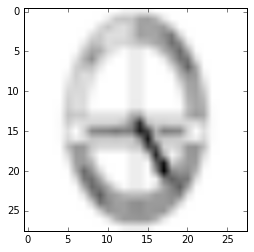

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xs[0],cmap='gray')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.1, random_state=42)

In [5]:
batch_size = 128
num_classes = 10
epochs = 12

print(x_train.shape)

#if K.image_data_format() == 'channels_first':
#x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#input_shape = (1, img_rows, img_cols)
#else:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
model.add(Conv2D(32, 3, 3,
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Activation('tanh'))
model.add(Dense(1, init = 'normal'))

#model.add(Dense(1, activation='softmax'))

model.compile(loss = 'mse', optimizer = 'Adam')

model.fit(x_train, y_train,
          batch_size=batch_size,
          nb_epoch=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


(324, 28, 28)
x_train shape: (324, 28, 28, 1)
324 train samples
36 test samples
Train on 324 samples, validate on 36 samples
Epoch 1/12
324/324 [==============================] - 0s - loss: 0.2657 - val_loss: 0.1927
Epoch 2/12
324/324 [==============================] - 0s - loss: 0.0997 - val_loss: 0.0901
Epoch 3/12
324/324 [==============================] - 0s - loss: 0.0991 - val_loss: 0.0817
Epoch 4/12
324/324 [==============================] - 0s - loss: 0.1020 - val_loss: 0.0995
Epoch 5/12
324/324 [==============================] - 0s - loss: 0.0930 - val_loss: 0.0953
Epoch 6/12
324/324 [==============================] - 0s - loss: 0.0819 - val_loss: 0.0796
Epoch 7/12
324/324 [==============================] - 0s - loss: 0.0870 - val_loss: 0.0649
Epoch 8/12
324/324 [==============================] - 0s - loss: 0.0767 - val_loss: 0.0560
Epoch 9/12
324/324 [==============================] - 0s - loss: 0.0728 - val_loss: 0.0496
Epoch 10/12
324/324 [==============================] - 0

In [15]:
for index in range(20):
    angle = float(model.predict(x_test[index][None, :, :, :], batch_size=1))
    print('====')
    print(angle*360)
    print(y_test[index]*360)

====
278.81019830703735
222.0
====
72.59457170963287
28.0
====
293.4763026237488
238.0
====
80.86284577846527
105.0
====
305.1907753944397
289.0
====
229.7216534614563
191.0
====
294.69889640808105
239.0
====
286.9644784927368
313.0
====
83.86799812316895
108.0
====
180.6688141822815
160.0
====
298.4285831451416
299.0
====
56.4379745721817
37.0
====
74.56301808357239
96.0
====
289.40764904022217
333.0
====
252.87943840026855
205.0
====
68.18946182727814
31.0
====
61.64753794670105
34.0
====
95.40676474571228
115.0
====
123.53628158569336
131.0
====
47.54541635513306
59.0
